Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


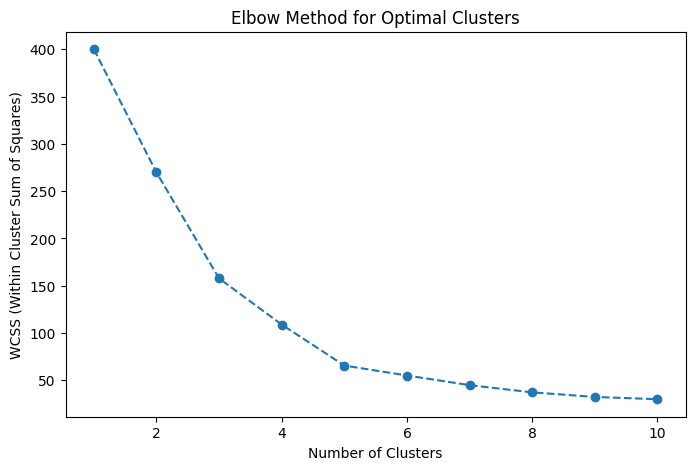

Clustered data saved to Mall_Customers_Clustered.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

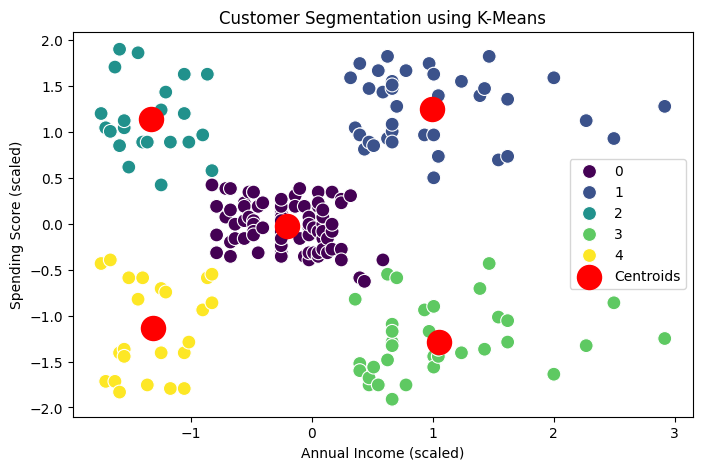

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files  # Import for downloading files in Google Colab

# Step 1: Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Step 2: Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Step 3: Selecting relevant features (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values  # Selecting "Annual Income" and "Spending Score"

# Step 4: Standardizing the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Using the Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Step 6: Training the model with the optimal number of clusters
optimal_clusters = 5  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters to each customer

# Step 7: Save the dataset with clusters to a CSV file
output_file = "Mall_Customers_Clustered.csv"
df.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")

# Step 8: Automatically trigger file download in Google Colab
files.download(output_file)  # This will prompt a file download in Colab

# Step 9: Plotting the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()
